<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing library

In [ ]:
import numpy as np
 #imports the NumPy library and assigns it an alias np.
import pandas as pd
#imports the Pandas library and assigns it an alias pd
import matplotlib.pyplot as plt
 #imports the pyplot module from the Matplotlib library and assigns it an alias plt.
import seaborn as sns
#imports the Seaborn library and assigns it an alias sns.
from sklearn.tree import DecisionTreeClassifier
#imports the DecisionTreeClassifier class from the tree module within the scikit-learn library.
from sklearn import metrics
#imports the metrics module from the scikit-learn library

import dataset

In [ ]:
#Importing the data file in dataframe formate
data=pd.read_csv('/content/Copy of bankloan(1).csv')
print(data)

     ID  Gender  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  \
0     1    male   25           1      49     91107       4    1.6          1   
1     2  female   45          19      34     90089       3    1.5          1   
2     3  female   39          15      11     94720       1    1.0          1   
3     4    male   35           9     100     94112       1    2.7          2   
4     5  female   35           8      45     91330       4    1.0          2   
..  ...     ...  ...         ...     ...       ...     ...    ...        ...   
95   96    male   38          12      48     95617       4    0.2          3   
96   97    male   41          15      80     95014       1    5.2          1   
97   98  female   54          28     161     92121       1    2.9          1   
98   99  female   49          23      94     92374       1    0.3          1   
99  100  female   66          41      15     91711       3    0.1          3   

    Mortgage  Personal.Loan  Securities

data preprocessing

In [ ]:
#Decripiton of the dataset
data.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,45.290000,20.140000,77.380000,93266.220000,2.410000,2.096000,1.950000,48.930000,0.120000,0.15000,0.050000,0.510000,0.230000
std,29.011492,10.797769,10.492922,47.933831,1752.890782,1.215182,1.831813,0.868936,96.969667,0.326599,0.35887,0.219043,0.502418,0.422953
min,1.000000,25.000000,-1.000000,8.000000,90019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25.750000,37.750000,12.750000,40.000000,91725.250000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50.500000,45.500000,20.000000,70.000000,94018.500000,2.000000,1.700000,2.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,75.250000,54.250000,28.250000,114.250000,94636.500000,4.000000,2.825000,3.000000,24.250000,0.000000,0.00000,0.000000,1.000000,0.000000
max,100.000000,67.000000,41.000000,194.000000,95819.000000,4.000000,8.900000,3.000000,455.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
#droping the unwanted data columns from the dataset
data_1=data.drop(['ZIP.Code','Family'],axis=1)
print(data_1)

     ID  Gender  Age  Experience  Income  CCAvg  Education  Mortgage  \
0     1    male   25           1      49    1.6          1         0   
1     2  female   45          19      34    1.5          1         0   
2     3  female   39          15      11    1.0          1         0   
3     4    male   35           9     100    2.7          2         0   
4     5  female   35           8      45    1.0          2         0   
..  ...     ...  ...         ...     ...    ...        ...       ...   
95   96    male   38          12      48    0.2          3         0   
96   97    male   41          15      80    5.2          1         0   
97   98  female   54          28     161    2.9          1         0   
98   99  female   49          23      94    0.3          1         0   
99  100  female   66          41      15    0.1          3         0   

    Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0               0                   1           0       0      

In [ ]:
#cheching the shape of the datset
data_1.shape

(100, 13)

In [ ]:
#describing the first five line of the dataset
data_1.head()

,ID,Gender,Age,Experience,Income,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,male,25,1,49,1.6,1,0,0,1,0,0,0
1,2,female,45,19,34,1.5,1,0,0,1,0,0,0
2,3,female,39,15,11,1.0,1,0,0,0,0,0,0
3,4,male,35,9,100,2.7,2,0,0,0,0,0,0
4,5,female,35,8,45,1.0,2,0,0,0,0,0,1


In [ ]:
#checking and counting the null values in the dataset
data_1.isnull().sum()

ID                    0
Gender                0
Age                   0
Experience            0
Income                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#counting the duplicate value in the dataset
data_1.duplicated().sum()

0

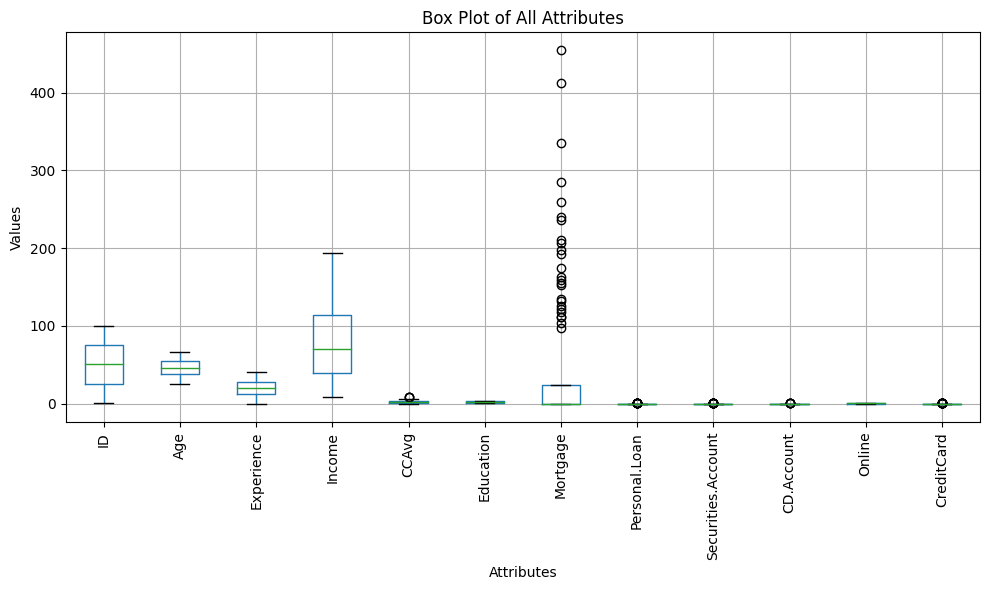

In [ ]:
# Create box plots for all attributes
plt.figure(figsize=(10, 6))  # Set the figure size
data_1.boxplot()  # Create box plots for all attributes
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of All Attributes')
plt.ylabel('Values')
plt.xlabel('Attributes')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

label encoding

In [ ]:
#performing the labelencoding for the categorical data
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data_1.columns:
    if data_1['Gender'].dtype == 'object':
        label_encoders['Gender'] = LabelEncoder()

# Fit and transform each categorical column
for column, encoder in label_encoders.items():
    data_1['Gender'] = encoder.fit_transform(data_1['Gender'])
print(data_1)

     ID  Gender  Age  Experience  Income  CCAvg  Education  Mortgage  \
0     1       1   25           1      49    1.6          1         0   
1     2       0   45          19      34    1.5          1         0   
2     3       0   39          15      11    1.0          1         0   
3     4       1   35           9     100    2.7          2         0   
4     5       0   35           8      45    1.0          2         0   
..  ...     ...  ...         ...     ...    ...        ...       ...   
95   96       1   38          12      48    0.2          3         0   
96   97       1   41          15      80    5.2          1         0   
97   98       0   54          28     161    2.9          1         0   
98   99       0   49          23      94    0.3          1         0   
99  100       0   66          41      15    0.1          3         0   

    Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0               0                   1           0       0      

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'target_column' is the column you want to predict
# Define all feature names in a list
feature_names = ['Gender', 'Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online']

X=data_1[feature_names]

y = data_1['CreditCard'] # Target variable
#spliting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(set(y))

{0, 1}


In [ ]:
#describing the decision tree as the training model
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

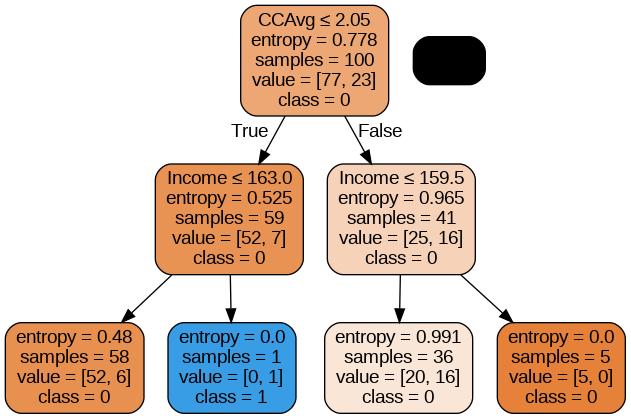

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Assuming 'model' is your decision tree model
# You can replace 'model' with the variable name of your actual model
# Make sure you've already trained the model before visualizing it

# Generate DOT data
dot_data = export_graphviz(model, out_file=None,feature_names=X.columns,
                           class_names=['0','1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# To save the visualization to a file
graph.write_png("decision_tree.png")

# To display the visualization in Jupyter Notebook
Image(graph.create_png())


In [ ]:
model = DecisionTreeClassifier(criterion='gini',max_depth=2)
model.fit(X, y)

DecisionTreeClassifier(max_depth=2)

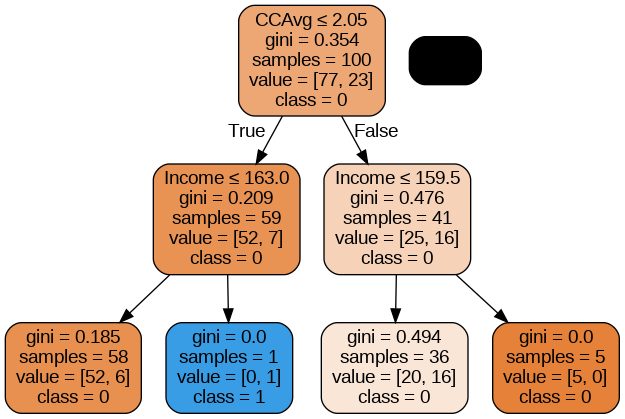

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Assuming 'model' is your decision tree model
# You can replace 'model' with the variable name of your actual model
# Make sure you've already trained the model before visualizing it

# Generate DOT data
dot_data = export_graphviz(model, out_file=None,feature_names=X.columns,
                           class_names=['0','1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# To save the visualization to a file
graph.write_png("decision_tree.png")

# To display the visualization in Jupyter Notebook
Image(graph.create_png())

prediction and trainig

In [ ]:
expected = data_1['CreditCard']
# Estimating Class Probabilities
probabilities = model.predict_proba(X)
print("Estimated class probabilities:", probabilities)


Estimated class probabilities: [[0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.55555556 0.44444444]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [1.         0.        ]
 [0.55555556 0.44444444]
 [0.89655172 0.10344828]
 [0.55555556 0.44444444]
 [0.55555556 0.44444444]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.55555556 0.44444444]
 [0.55555556 0.44444444]
 [1.         0.        ]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.55555556 0.44444444]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.55555556 0.44444444]
 [0.55555556 0.44444444]
 [0.55555556 0.44444444]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.89655172 0.10344828]
 [0.55555556 0.44444444]
 [0.89655172 0.10344828]
 [0.55555556 0.4444

In [ ]:
#predicted score value of model
predicted=model.predict(X)
print(predicted)
# Calculate the R^2 score
model.score(X,y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.78

In [ ]:
#expected value of y
expected=y
print(expected)

0     0
1     0
2     0
3     0
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: CreditCard, Length: 100, dtype: int64


[0.22611665 0.22611665 0.22611665 0.22611665 0.22611665 0.22611665
 0.22611665 0.22611665 0.22611665 0.22611665 0.22611665 0.22611665
 0.22611665 0.22611665 0.22611665 0.22611665 0.22611665 0.22611665
 0.22611665 0.22611665 0.22611665 0.22611665 0.22611665 0.22611665
 0.22611665 0.22611665 0.1701365  0.1701365  0.1701365  0.1701365
 0.1701365  0.1701365  0.1701365  0.1701365  0.1701365  0.1701365
 0.1701365  0.1701365  0.1701365  0.1701365  0.1701365  0.1701365
 0.1701365  0.1701365  0.1701365  0.1701365  0.1701365  0.1701365
 0.1701365  0.1701365  0.1701365  0.1701365  0.1701365  0.1701365
 0.1701365  0.1701365  0.1701365  0.1701365  0.1701365  0.1701365
 0.1701365  0.1701365  0.1701365  0.1701365  0.1701365  0.1701365
 0.1701365  0.1701365  0.03977898 0.03977898 0.03977898 0.03977898
 0.03977898 0.03977898 0.03977898 0.03977898 0.03977898 0.03977898
 0.03977898 0.03977898 0.03977898 0.03977898 0.03977898 0.03977898
 0.03977898 0.03977898 0.03977898 0.03977898 0.03977898 0.03977898
 0

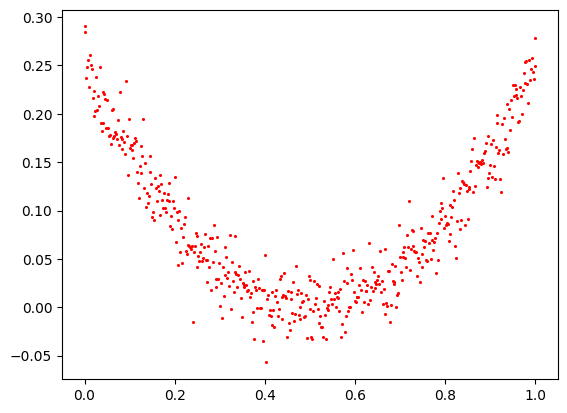

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
X = np.linspace(start=0, stop=1, num=500)
y = (X-0.5)**2 + np.random.randn(500)/50
plt.scatter(X, y, s=1.5, c='red')
model = DecisionTreeRegressor(max_depth=2)
model.fit(X.reshape(-1, 1),y)
DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None)
''' " max_leaf_nodes=None, min_impurity_decrease=0.0,\n",
 " min_impurity_split=None, min_samples_leaf=1,\n",
 " min_samples_split=2, min_weight_fraction_leaf=0.0,\n",
 " presort=False, random_state=None, splitter='best')"'''
export_graphviz(model)
predicted = model.predict(X.reshape(-1, 1))
print(predicted)


In [ ]:
"""#Tree Visualization
from sklearn.tree import export_graphviz
export_graphviz(model,
 out_file=None,
 feature_names=X.columns,
 class_names=['0','1'],
 rounded=True,
 filled=True)
! dot -Tpng name_location_outputfile.dot -o output_location/iris_tree.png"""

"#Tree Visualization\nfrom sklearn.tree import export_graphviz\nexport_graphviz(model,\n out_file=None,\n feature_names=X.columns,\n class_names=['0','1'],\n rounded=True,\n filled=True)\n! dot -Tpng name_location_outputfile.dot -o output_location/iris_tree.png"